<a href="https://colab.research.google.com/github/Frasierzzz/DPDM2024/blob/main/DPDM_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import time
# while True:
#     time.sleep(60)
#     print("Preventing idle disconnection")


# Libraries

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00


In [ ]:
# Import libraries ที่จำเป็น
import torch; import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import json; import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

In [ ]:
import random
random.seed(14)

In [ ]:
# Function load Datasets that's .json file.
def load_datasets(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Turn .JSON to DataFrame
    # dataset = pd.json_normalize(data, record_path=['interaction'], meta=['database_id', ['final', 'utterance'], ['final', 'query']])
    return data

## Spider dataset

In [ ]:
from datasets import load_dataset
spider_dataset = load_dataset("spider")

README.md:   0%|          | 0.00/5.51k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/831k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/126k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1034 [00:00<?, ? examples/s]

In [ ]:
spider_dataset

DatasetDict({
    train: Dataset({
        features: ['db_id', 'query', 'question', 'query_toks', 'query_toks_no_value', 'question_toks'],
        num_rows: 7000
    })
    validation: Dataset({
        features: ['db_id', 'query', 'question', 'query_toks', 'query_toks_no_value', 'question_toks'],
        num_rows: 1034
    })
})

In [ ]:
# แบ่งข้อมูล train และ validation dataset ให้มีขนาด 10%
spider_train_sample = spider_dataset['train'].train_test_split(test_size=0.1, shuffle=True, seed=14)['test']
spider_validation_sample = spider_dataset['validation'].train_test_split(test_size=0.1, shuffle=True, seed=14)['test']

In [ ]:
print(len(spider_train_sample),len(spider_validation_sample))

700 104


In [ ]:
# spider_train_sample = spider_train_sample.select_columns(['db_id', 'query', 'question'])
# spider_validation_sample = spider_validation_sample.select_columns(['db_id', 'query', 'question'])

In [ ]:
spider_train_sample[0:1]

{'db_id': ['document_management'],
 'query': ['SELECT document_name ,  access_count FROM documents ORDER BY document_name'],
 'question': ['What are the names of all the documents, as well as the access counts of each, ordered alphabetically?'],
 'query_toks': [['SELECT',
   'document_name',
   ',',
   'access_count',
   'FROM',
   'documents',
   'ORDER',
   'BY',
   'document_name']],
 'query_toks_no_value': [['select',
   'document_name',
   ',',
   'access_count',
   'from',
   'documents',
   'order',
   'by',
   'document_name']],
 'question_toks': [['What',
   'are',
   'the',
   'names',
   'of',
   'all',
   'the',
   'documents',
   ',',
   'as',
   'well',
   'as',
   'the',
   'access',
   'counts',
   'of',
   'each',
   ',',
   'ordered',
   'alphabetically',
   '?']]}

In [ ]:
spider_validation_sample[0:1]

{'db_id': ['concert_singer'],
 'query': ['select t2.name ,  t2.capacity from concert as t1 join stadium as t2 on t1.stadium_id  =  t2.stadium_id where t1.year  >  2013 group by t2.stadium_id order by count(*) desc limit 1'],
 'question': ['What is the name and capacity of the stadium with the most concerts after 2013 ?'],
 'query_toks': [['select',
   't2.name',
   ',',
   't2.capacity',
   'from',
   'concert',
   'as',
   't1',
   'join',
   'stadium',
   'as',
   't2',
   'on',
   't1.stadium_id',
   '=',
   't2.stadium_id',
   'where',
   't1.year',
   '>',
   '2013',
   'group',
   'by',
   't2.stadium_id',
   'order',
   'by',
   'count',
   '(',
   '*',
   ')',
   'desc',
   'limit',
   '1']],
 'query_toks_no_value': [['select',
   't2',
   '.',
   'name',
   ',',
   't2',
   '.',
   'capacity',
   'from',
   'concert',
   'as',
   't1',
   'join',
   'stadium',
   'as',
   't2',
   'on',
   't1',
   '.',
   'stadium_id',
   '=',
   't2',
   '.',
   'stadium_id',
   'where',
   

## CoSQL dataset

In [ ]:
cosql_train = load_datasets("/content/drive/MyDrive/DPDM_PJ/CoSQL/cosql_train.json")
cosql_validation = load_datasets("/content/drive/MyDrive/DPDM_PJ/CoSQL/cosql_dev.json")

In [ ]:
print(len(cosql_train),len(cosql_validation))

2159 293


In [ ]:
# แบ่งข้อมูล train และ validation dataset ให้มีขนาด 10%
cosql_train_sample = random.sample(cosql_train, int(len(cosql_train) * 0.1))
cosql_validation_sample = random.sample(cosql_validation, int(len(cosql_validation) * 0.1))

In [ ]:
print(len(cosql_train_sample),len(cosql_validation_sample))

215 29


In [ ]:
print(cosql_train_sample[0:1])
print(cosql_validation_sample[0:1])

[{'final': {'utterance': 'Give me the start station and end station for the trips with the three oldest id.', 'query': 'SELECT start_station_name ,  end_station_name FROM trip ORDER BY id LIMIT 3'}, 'database_id': 'bike_1', 'interaction': [{'utterance': 'how many trip are presented on the table', 'utterance_toks': ['how', 'many', 'trip', 'are', 'presented', 'on', 'the', 'table'], 'query': 'SELECT count ( * )  FROM trip', 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'trip'], 'sql': {'from': {'table_units': [['table_unit', 2]], 'conds': []}, 'select': [False, [[3, [0, [0, 0, False], None]]]], 'where': [], 'groupBy': [], 'having': [], 'orderBy': [], 'limit': None, 'intersect': None, 'union': None, 'except': None}}, {'utterance': 'show all the start station name', 'utterance_toks': ['show', 'all', 'the', 'start', 'station', 'name'], 'query': 'SELECT start_station_name FROM trip', 'query_toks_no_value': ['select', 'start_station_name', 'from', 'trip'], 'sql': {'from': {

## SparC dataset

In [ ]:
sparc_train = load_datasets("/content/drive/MyDrive/DPDM_PJ/SparC/SparC_train.json")
sparc_validation = load_datasets("/content/drive/MyDrive/DPDM_PJ/SparC/SparC_dev.json")

In [ ]:
print(len(sparc_train),len(sparc_validation))

3034 422


In [ ]:
# แบ่งข้อมูล train และ validation dataset ให้มีขนาด 10%
sparc_train_sample = random.sample(sparc_train, int(len(sparc_train) * 0.1))
sparc_validation_sample = random.sample(sparc_validation, int(len(sparc_validation) * 0.1))

In [ ]:
print(len(sparc_train_sample),len(sparc_validation_sample))

303 42


In [ ]:
print(sparc_train_sample[0:1])
print(sparc_validation_sample[0:1])

[{'database_id': 'voter_2', 'interaction': [{'query': 'SELECT DISTINCT Major FROM STUDENT WHERE Sex = "F"', 'utterance_toks': ['List', 'the', 'majors', 'of', 'female', 'students', '.'], 'utterance': 'List the majors of female students.', 'sql': {'orderBy': [], 'from': {'table_units': [['table_unit', 0]], 'conds': []}, 'union': None, 'except': None, 'having': [], 'limit': None, 'intersect': None, 'where': [[False, 2, [0, [0, 5, False], None], '"F"', None]], 'groupBy': [], 'select': [True, [[0, [0, [0, 6, False], None]]]]}}, {'query': 'SELECT DISTINCT Major FROM STUDENT WHERE Sex = "F" GROUP BY major ORDER BY count(*) DESC', 'utterance_toks': ['Order', 'the', 'majors', 'by', 'decreasing', 'number', 'of', 'students', '.'], 'utterance': 'Order the majors by decreasing number of students.', 'sql': {'orderBy': ['desc', [[0, [3, 0, False], None]]], 'from': {'table_units': [['table_unit', 0]], 'conds': []}, 'union': None, 'except': None, 'having': [], 'limit': None, 'intersect': None, 'where':

# Setting Input



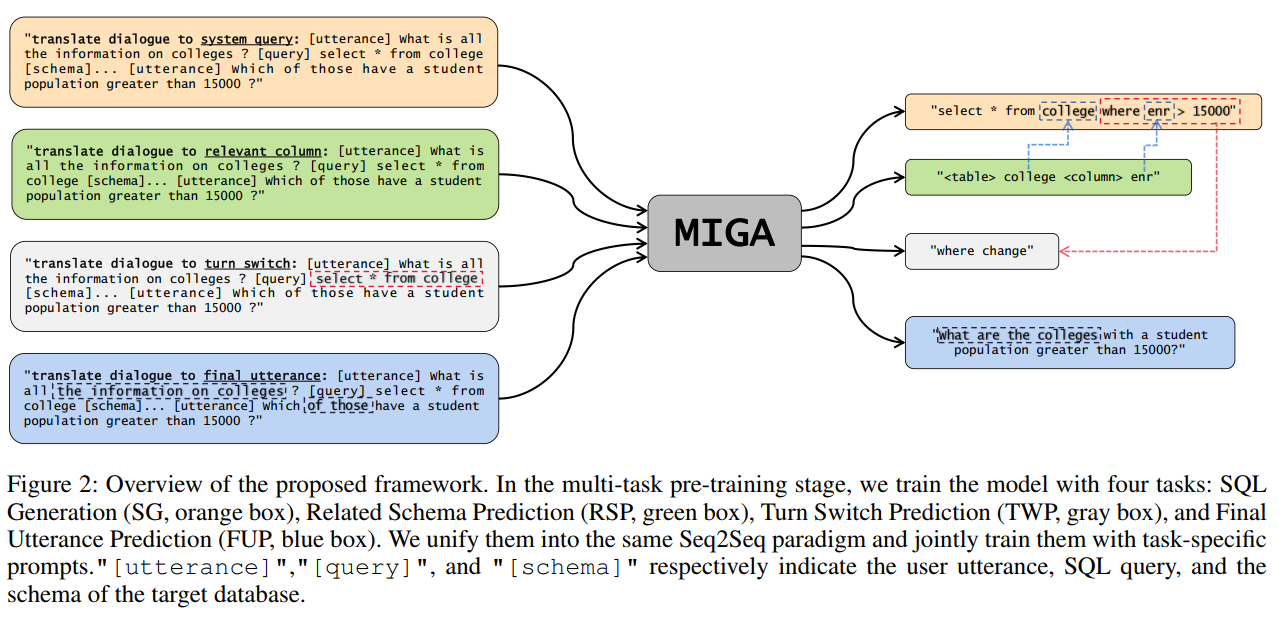

$$ D_1 = \{ D_{\text{SG}}, D_{\text{RSP}}, D_{\text{TWP}}, D_{\text{FUP}} \} = \{ (Z_T, X, y)_i \mid i \in D1 \} $$

โดยที่

$ T \in \{ \text{SG}, \text{RSP}, \text{TWP}, \text{FUP} \} $ หมายถึง ประเภทของงานที่ตัวอย่างนั้นเป็นอยู่  
$  Z_T  $ หมายถึง prompt ที่เป็นประโยคเพื่อแนะนำ task แต่ละประเภทตามที่แสดงในรูปที่ 2


$ X $ คือข้อมูลนำเข้าของโมเดล ซึ่งเป็นการรวมกันของข้อความคำถามจากผู้ใช้ในปัจจุบัน ข้อความคำถามก่อนหน้า และ SQL query รวมถึง schema จัดเรียงดังนี้:

$$
X = [u_1, s_1, u_2, s_2, \dots, u_t, D]
$$



โดยที่ schema $ D $ ถูกจัดรูปแบบดังนี้:

$$
D = [t_1, c_{11}, c_{12}, \dots, t_2, c_{21}, c_{22}, \dots, \dots]
$$




และ $ y $ คือผลลัพธ์ที่โมเดลสร้างขึ้นสำหรับงาน $ T $ ซึ่งถูกย่อไว้ในรูปที่ 2

<!-- กำหนดให้ $u_t$ คือบทสนทนาของผู้ใช้ ณ ปัจจุบัน

ดังนั้นประวัติการสนทนาคือ $h_t=[u_1,u_2,...,u_{t-1}]$

schema ของฐานข้อมูลเป้าหมาย คือ $D = (T,C)$ โดยจะอยู่ในรูป $ D = [t_1, c_{11}, c_{12}, ..., t_2, c_{21}, c_{22}, ..., ...] $

โดยเป้าหมายของเราคือการทำนาย SQL query ของการสนทนา ณ ปัจจุบัน $s_t$ -->

<!-- ในขั้นตอนี้ นอกจาการเทรน SG แล้วยังมีการเทรนงานย่อยอีกสามงานได้แก่ RSP TWP FUP เพื่อเพิ่มประสิทธิภาพในการทำงาน โดยป้ายกำกับ ,บทสนา เป้าหมาย และเอาท์พุตของโมเดลจะถูกกำหนดดังนี้

$$ S = {Z_T, X, y} $$

เมื่อ $ T \in \{ \text{SG}, \text{RSP}, \text{TWP}, \text{FUP} \} $

$  Z_T  $ หมายถึง prompt ที่เป็นประโยคเพื่อแนะนำ task แต่ละประเภท -->

<!-- $L:$ ความยาวของลำดับคำตอบ (target sequence) หรือจำนวนคำในคำตอบ 𝑦

$θ:$ พารามิเตอร์ของโมเดล (สิ่งที่เราต้องการอัปเดตเพื่อให้โมเดลเรียนรู้จากข้อมูลการเทรน)

$y_l:$ คำตอบในตำแหน่งที่
$l$ ของลำดับคำตอบ

$y_{<l}:$ ลำดับของคำตอบก่อนถึงตำแหน่ง $l$ ซึ่งจะช่วยให้โมเดลทำนายคำถัดไปในลำดับได้อย่างแม่นยำมากขึ้น -->

## Prompt

In [ ]:
# ตั้งค่า prompt อิงตามรูปที่ 2 ในเอกสาร
prompt_map = {
    "SG": "translate dialogue to system query:",
    "RSP": "translate dialogue to relevant column:",
    "TWP": "translate dialogue to turn switch:",
    "FUP": "translate dialogue to final utterance:"}

## Function

### Function for RSP

In [ ]:
import re

def extract_schema_from_query_with_alias(query):
    # ทำให้ query เป็นตัวพิมพ์เล็กเพื่อให้ค้นหาข้อมูลได้ง่าย
    query = query.lower()

    # จับคู่ alias และตารางในรูปแบบ table AS alias
    alias_mapping = dict(re.findall(r'(\w+)\s+as\s+(\w+)', query))

    # ดึงชื่อตารางในกรณีไม่มี alias และรวมกับ alias ที่หาได้
    tables = re.findall(r'(?:from|join)\s+(\w+)', query)
    tables = list(set(tables) | set(alias_mapping.keys()))  # รวม alias กับชื่อจริงของตาราง

    # ดึงคอลัมน์ทั้งหมดในส่วน SELECT รวมถึงกรณีที่ใช้ฟังก์ชัน เช่น COUNT(*)
    select_pattern = re.search(r'select\s+(.*?)\s+from', query, re.IGNORECASE)
    mapped_columns = []

    if select_pattern:
        # แยกคอลัมน์แต่ละรายการตามจุลภาค
        col_names = [col.strip() for col in select_pattern.group(1).split(',')]

        for col in col_names:
            # ตรวจจับฟังก์ชัน เช่น COUNT(column), SUM(column)
            func_pattern = re.match(r'(\w+)\((.*?)\)', col)
            if func_pattern:
                _, col_inside_func = func_pattern.groups()
                # กรณีมี table.column หรือ alias.column
                if '.' in col_inside_func:
                    table_alias, column = col_inside_func.split('.', 1)  # แยกเฉพาะจุดแรก
                    table_name = alias_mapping.get(table_alias, table_alias)
                    mapped_columns.append(f"{table_name}.{column}")
                else:
                    mapped_columns.append(col_inside_func)  # กรณีไม่มี table alias
            else:
                # กรณีทั่วไป เช่น table.column หรือ column
                if '.' in col:
                    table_alias, column = col.split('.', 1)  # แยกเฉพาะจุดแรก
                    table_name = alias_mapping.get(table_alias, table_alias)
                    mapped_columns.append(f"{table_name}.{column}")
                else:
                    mapped_columns.append(col)  # กรณีไม่มี table alias

    return {"tables": tables, "columns": list(set(mapped_columns))}


### Function for TWP

In [ ]:
def extract_query_difference_from_structured_sql(sql1, sql2):
    # ถ้า sql1 หรือ sql2 เป็น None ให้กำหนดเป็น {}
    sql1 = sql1 or {}
    sql2 = sql2 or {}

    differences = []

    # ตรวจสอบการเปลี่ยนแปลงในแต่ละ clause โดยเพิ่มเฉพาะชื่อ clause ที่มีการเปลี่ยนแปลง
    if sql1.get("select") != sql2.get("select"):
        differences.append("SELECT")

    if sql1.get("from") != sql2.get("from"):
        differences.append("FROM")

    if sql1.get("where") != sql2.get("where"):
        differences.append("WHERE")

    if sql1.get("groupBy") != sql2.get("groupBy"):
        differences.append("GROUP BY")

    if sql1.get("orderBy") != sql2.get("orderBy"):
        differences.append("ORDER BY")

    if sql1.get("limit") != sql2.get("limit"):
        differences.append("LIMIT")

    if sql1.get("union") != sql2.get("union"):
        differences.append("UNION")

    if sql1.get("except") != sql2.get("except"):
        differences.append("EXCEPT")

    if sql1.get("intersect") != sql2.get("intersect"):
        differences.append("INTERSECT")

    # หากไม่มีการเปลี่ยนแปลงในทุก clause ให้แสดงว่าไม่มีการเปลี่ยนแปลง
    if not differences:
        return {"changed_clause": "None"}
    else:
        return {"changed_clause": differences}


### Function for all

In [ ]:
def prepare_data(data, dataset_name):
    prepared_data = []

    for item in data:
        Z_T_combined = []  # ลิสต์เก็บเซต task แต่ละรอบ
        X_combined = []    # ลิสต์เก็บคำถามและ query แต่ละรอบ
        y_combined = []    # ลิสต์เก็บผลลัพธ์ y แต่ละรอบ

        # สร้าง schema D ในรูปแบบ [t1, c11, c12, ..., t2, c21, c22, ...]
        D = []

        if dataset_name == "spider":
            db_id = item.get("db_id", "")
            rsp_schema = extract_schema_from_query_with_alias(item.get("query", ""))

            # เพิ่ม db_id และคอลัมน์ที่เกี่ยวข้อง
            D.append(db_id)
            D.extend(sorted(set(rsp_schema["columns"])))
            user_utterance = item.get("question", "")
            X_base = [user_utterance] + D

            # สร้าง Z_T, X และ y สำหรับแต่ละ task
            Z_T_combined.append({"SG", "RSP"})
            X_combined.extend([user_utterance, item.get("query", ""), D])
            y_combined.append({
                "SG": item.get("query", ""),
                "RSP": rsp_schema
            })

        elif dataset_name in ["cosql", "sparc"]:
            final_query = item.get("final", {}).get("query", "")
            final_schema = extract_schema_from_query_with_alias(final_query)

            # จัดรูปแบบ D ให้เป็น [t1, c11, c12, ..., t2, c21, c22, ...]
            for table in final_schema["tables"]:
                D.append(table)
                columns_for_table = [col for col in final_schema["columns"] if col.startswith(f"{table}.")]
                D.extend(sorted(set(columns_for_table)))

            previous_sql = None
            for turn, interaction in enumerate(item.get("interaction", [])):
                Z_T_round = {"SG", "RSP"}  # Task สำหรับรอบนี้
                round_X = [interaction.get("utterance", "")] + D
                round_y = {
                    "SG": interaction.get("query", ""),
                    "RSP": extract_schema_from_query_with_alias(interaction.get("query", ""))
                }

                # เพิ่ม TWP สำหรับทุก turn ยกเว้น turn แรก
                if turn > 0:
                    current_sql = interaction.get("sql", {})
                    Z_T_round.add("TWP")
                    round_y["TWP"] = extract_query_difference_from_structured_sql(previous_sql, current_sql)
                    previous_sql = current_sql

                # เพิ่ม FUP เฉพาะ turn สุดท้าย
                if turn == len(item["interaction"]) - 1:
                    Z_T_round.add("FUP")
                    round_y["FUP"] = item["final"].get("query", "")

                # บันทึกข้อมูลของแต่ละรอบ
                Z_T_combined.append(Z_T_round)
                X_combined.extend([interaction.get("utterance", ""), interaction.get("query", ""), D])
                y_combined.append(round_y)

        # จัดเก็บข้อมูลในรูปแบบตามที่ต้องการ
        prepared_data.append({
            "Z_T": Z_T_combined,
            "X": X_combined,
            "y": y_combined
        })

    return prepared_data


## Prepare $D$ of dataset

### $D$ for Spider dataset

In [ ]:
D_spider = prepare_data(spider_train_sample,'spider')
D_spider[0]

{'Z_T': [{'RSP', 'SG'}],
 'X': ['What are the names of all the documents, as well as the access counts of each, ordered alphabetically?',
  'SELECT document_name ,  access_count FROM documents ORDER BY document_name',
  ['document_management', 'access_count', 'document_name']],
 'y': [{'SG': 'SELECT document_name ,  access_count FROM documents ORDER BY document_name',
   'RSP': {'tables': ['documents'],
    'columns': ['access_count', 'document_name']}}]}

In [ ]:
print(len(spider_train_sample),len(D_spider))

700 700


### $D$ for CoSQL dataset

In [ ]:
D_cosql = prepare_data(cosql_train_sample,'cosql')
D_cosql[0]

{'Z_T': [{'RSP', 'SG'}, {'RSP', 'SG', 'TWP'}, {'FUP', 'RSP', 'SG', 'TWP'}],
 'X': ['how many trip are presented on the table',
  'SELECT count ( * )  FROM trip',
  ['trip'],
  'show all the start station name',
  'SELECT start_station_name FROM trip',
  ['trip'],
  'what is the start date of Howard at 2nd | Do you mean its start station is Howard at 2nd? | exactly',
  'SELECT start_date FROM trip where start_station_name  =  "Howard at 2nd"',
  ['trip']],
 'y': [{'SG': 'SELECT count ( * )  FROM trip',
   'RSP': {'tables': ['trip'], 'columns': ['count ( * )']}},
  {'SG': 'SELECT start_station_name FROM trip',
   'RSP': {'tables': ['trip'], 'columns': ['start_station_name']},
   'TWP': {'changed_clause': ['SELECT',
     'FROM',
     'WHERE',
     'GROUP BY',
     'ORDER BY']}},
  {'SG': 'SELECT start_date FROM trip where start_station_name  =  "Howard at 2nd"',
   'RSP': {'tables': ['trip'], 'columns': ['start_date']},
   'TWP': {'changed_clause': ['SELECT', 'WHERE']},
   'FUP': 'SELECT 

In [ ]:
print(len(cosql_train_sample),len(D_cosql))

215 215


### $D$ for SparC dataset

In [ ]:
D_sparc = prepare_data(sparc_train_sample, "sparc")
D_sparc[0]

{'Z_T': [{'RSP', 'SG'}, {'RSP', 'SG', 'TWP'}, {'FUP', 'RSP', 'SG', 'TWP'}],
 'X': ['List the majors of female students.',
  'SELECT DISTINCT Major FROM STUDENT WHERE Sex = "F"',
  ['student'],
  'Order the majors by decreasing number of students.',
  'SELECT DISTINCT Major FROM STUDENT WHERE Sex = "F" GROUP BY major ORDER BY count(*) DESC',
  ['student'],
  'What is the most common major?',
  'SELECT Major FROM STUDENT WHERE Sex  =  "F" GROUP BY major ORDER BY count(*) DESC LIMIT 1',
  ['student']],
 'y': [{'SG': 'SELECT DISTINCT Major FROM STUDENT WHERE Sex = "F"',
   'RSP': {'tables': ['student'], 'columns': ['distinct major']}},
  {'SG': 'SELECT DISTINCT Major FROM STUDENT WHERE Sex = "F" GROUP BY major ORDER BY count(*) DESC',
   'RSP': {'tables': ['student'], 'columns': ['distinct major']},
   'TWP': {'changed_clause': ['SELECT',
     'FROM',
     'WHERE',
     'GROUP BY',
     'ORDER BY']}},
  {'SG': 'SELECT Major FROM STUDENT WHERE Sex  =  "F" GROUP BY major ORDER BY count(*) DE

In [ ]:
print(len(sparc_train_sample),len(D_sparc))

303 303


# Model Training

## Setup Model

In [ ]:
D1 = D_spider + D_cosql + D_sparc
D1[0]

{'Z_T': [{'RSP', 'SG'}],
 'X': ['What are the names of all the documents, as well as the access counts of each, ordered alphabetically?',
  'SELECT document_name ,  access_count FROM documents ORDER BY document_name',
  ['document_management', 'access_count', 'document_name']],
 'y': [{'SG': 'SELECT document_name ,  access_count FROM documents ORDER BY document_name',
   'RSP': {'tables': ['documents'],
    'columns': ['access_count', 'document_name']}}]}

In [ ]:
!pip install transformers torch

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# โหลดโทเคไนเซอร์และโมเดล
tokenizer = T5Tokenizer.from_pretrained('t5-base')
model = T5ForConditionalGeneration.from_pretrained('t5-base')


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
def tokenize_data_multi_task(data, tokenizer, max_length=128):
    """
    Tokenizes data for multi-task pre-training with task-specific prompts.

    Parameters:
    - data: List of dictionaries where each dictionary has 'X' as the question and
            'y' as the SQL answer with task-specific details.
    - tokenizer: Tokenizer from  T5Tokenizer.
    - max_length: Maximum sequence length for padding/truncation.

    Returns:
    - input_ids: Tokenized input IDs with task-specific prompts.
    - labels: Tokenized output IDs.
    """
    inputs = []
    outputs = []

    for item in data:
        task = item.get("task")
        input_text = item.get('X', [""])[0]  # ใช้ X[0] เป็นคำถาม

        # ใส่ prompt สำหรับแต่ละ task
        if task == "SG":
            prompt = "[utterance] "
        elif task == "RSP":
            prompt = "[schema] "
        elif task == "TWP":
            prompt = "[turn] "
        elif task == "FUP":
            prompt = "[final] "
        else:
            prompt = ""

        # ตรวจสอบและเข้าถึง output_text ตามโครงสร้างของ 'y'
        if isinstance(item.get('y'), list) and len(item['y']) > 0:
            output_text = item['y'][0].get(task, "")  # ดึงค่าใน list ตำแหน่งแรก
        else:
            output_text = item.get('y', {}).get(task, "")

        # Tokenize input พร้อม prompt และ output
        tokenized_input = tokenizer(
            prompt + input_text,  # รวม prompt
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )

        tokenized_output = tokenizer(
            output_text,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )

        inputs.append(tokenized_input['input_ids'])
        outputs.append(tokenized_output['input_ids'])

    # Convert lists to tensors for input_ids and labels
    input_ids = torch.cat(inputs, dim=0)
    labels = torch.cat(outputs, dim=0)

    return input_ids, labels


In [ ]:
# โทเคไนซ์ข้อมูลเทรน
train_inputs, train_labels = tokenize_data_multi_task(D1, tokenizer)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from transformers import Adafactor, AdamW, get_linear_schedule_with_warmup

In [ ]:
# สร้าง Custom Dataset และแปลงข้อมูลให้เป็น Tensor
class CustomDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.inputs[idx], dtype=torch.long)  # แปลงเป็น Tensor
        labels = torch.tensor(self.labels[idx], dtype=torch.long)      # แปลงเป็น Tensor
        return input_ids, labels

In [ ]:
# สร้าง dataset และ DataLoader
train_dataset = CustomDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

In [ ]:
# ตั้งค่า optimizer เป็น Adafactor ตามเอกสาร
optimizer = Adafactor(
    model.parameters(),
    lr=1e-4,
    scale_parameter=True,
    relative_step=False
)

In [ ]:
# ตั้งค่าการเทรน
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [ ]:
# เริ่มการเทรนแบบ Custom Loop
num_epochs = 1  # จำนวน epoch ที่ต้องการ
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        # รับ input และ labels จาก DataLoader
        input_ids, labels = batch

        # ส่งข้อมูลไปยังอุปกรณ์ (GPU หรือ CPU)
        input_ids = input_ids.to(device)
        labels = labels.to(device)

        # Forward pass คำนวณค่า loss อัตโนมัติ
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass และอัปเดตค่าในโมเดล
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # แสดงค่าเฉลี่ยของ loss หลังจากจบแต่ละ epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1} completed with average loss: {avg_loss}")

<ipython-input-41-d1c608669f1b>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(self.inputs[idx], dtype=torch.long)  # แปลงเป็น Tensor
<ipython-input-41-d1c608669f1b>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(self.labels[idx], dtype=torch.long)      # แปลงเป็น Tensor


Epoch 1 completed with average loss: 0.3188078032771344


In [ ]:
# เซฟโมเดลไปยัง Google Drive
model.save_pretrained('/content/drive/MyDrive/saved_model')
tokenizer.save_pretrained('/content/drive/MyDrive/saved_model')


('/content/drive/MyDrive/saved_model/tokenizer_config.json',
 '/content/drive/MyDrive/saved_model/special_tokens_map.json',
 '/content/drive/MyDrive/saved_model/spiece.model',
 '/content/drive/MyDrive/saved_model/added_tokens.json')

In [ ]:
# โหลดโมเดลและโทเคไนเซอร์ที่เซฟไว้
from transformers import T5ForConditionalGeneration, T5Tokenizer

# แก้ไข path ให้เป็น path ของ folder ที่บรรจุไฟล์ model.safetensors
model = T5ForConditionalGeneration.from_pretrained('/content/drive/MyDrive/saved_model')
tokenizer = T5Tokenizer.from_pretrained('/content/drive/MyDrive/saved_model')

# Database

In [ ]:
import os
import sqlite3

def load_schemas_from_database_folder(folder_path):
    databases = {}

    for db_folder in os.listdir(folder_path):
        db_path = os.path.join(folder_path, db_folder, f"{db_folder}.sqlite")  # ตรวจสอบว่ามีไฟล์ .sqlite อยู่ในแต่ละโฟลเดอร์
        if os.path.isfile(db_path):
            conn = sqlite3.connect(db_path)
            cursor = conn.cursor()

            # ดึงข้อมูลตารางในฐานข้อมูล
            cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
            tables = cursor.fetchall()

            # สร้าง schema สำหรับฐานข้อมูลนี้
            schema = {}
            for table_name in tables:
                table_name = table_name[0]
                cursor.execute(f"PRAGMA table_info({table_name})")
                columns = cursor.fetchall()
                schema[table_name] = [col[1] for col in columns]  # เก็บชื่อคอลัมน์ในแต่ละตาราง

            databases[db_folder] = schema
            conn.close()

    return databases

In [ ]:
sparc_databases = load_schemas_from_database_folder("/content/drive/MyDrive/DPDM_PJ/SparC/database")
cosql_databases = load_schemas_from_database_folder("/content/drive/MyDrive/DPDM_PJ/CoSQL/database")

In [ ]:
print(sparc_databases)
print(cosql_databases)

{'aircraft': {'pilot': ['Pilot_Id', 'Name', 'Age'], 'aircraft': ['Aircraft_ID', 'Aircraft', 'Description', 'Max_Gross_Weight', 'Total_disk_area', 'Max_disk_Loading'], 'match': ['Round', 'Location', 'Country', 'Date', 'Fastest_Qualifying', 'Winning_Pilot', 'Winning_Aircraft'], 'airport': ['Airport_ID', 'Airport_Name', 'Total_Passengers', '%_Change_2007', 'International_Passengers', 'Domestic_Passengers', 'Transit_Passengers', 'Aircraft_Movements', 'Freight_Metric_Tonnes'], 'airport_aircraft': ['ID', 'Airport_ID', 'Aircraft_ID']}, 'allergy_1': {'Allergy_Type': ['Allergy', 'AllergyType'], 'Has_Allergy': ['StuID', 'Allergy'], 'Student': ['StuID', 'LName', 'Fname', 'Age', 'Sex', 'Major', 'Advisor', 'city_code']}, 'academic': {'author': ['aid', 'homepage', 'name', 'oid'], 'conference': ['cid', 'homepage', 'name'], 'domain': ['did', 'name'], 'domain_author': ['aid', 'did'], 'domain_conference': ['cid', 'did'], 'journal': ['homepage', 'jid', 'name'], 'domain_journal': ['did', 'jid'], 'keyword'

# Test model

In [ ]:
def generate_sql_query(model, tokenizer, input_text):
    """สร้าง SQL query โดยใช้โมเดล T5"""
    inputs = tokenizer.encode(input_text, return_tensors="pt")
    outputs = model.generate(inputs, max_length=50)
    generated_query = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_query

# something

In [ ]:
class InteractionManager:
    def __init__(self):
        self.context = []

    def add_interaction(self, user_utterance, system_response=None):
        """เพิ่มบทสนทนาใหม่ใน context"""
        interaction = {'user': user_utterance}
        if system_response:
            interaction['system'] = system_response
        self.context.append(interaction)

    def get_context(self):
        """ดึง context ล่าสุดทั้งหมด"""
        return self.context

    def reset_context(self):
        """รีเซ็ต context"""
        self.context = []

In [ ]:
class QueryManager:
    def __init__(self, databases):
        """ตั้งค่า Query Manager และเชื่อมโยงกับฐานข้อมูลที่เตรียมไว้"""
        self.databases = databases

    def validate_query(self, query, db_id):
        """ตรวจสอบว่า query ตรงกับโครงสร้างของฐานข้อมูล"""
        schema = self.databases.get(db_id)

        # ตรวจสอบว่าตารางที่อยู่ใน query ตรงกับ schema ของ db_id หรือไม่
        for table_name in schema.keys():
            if table_name in query:
                return True
        return False

In [ ]:
def generate_sql_query(model, tokenizer, user_utterance):
    """สร้าง SQL query โดยใช้โมเดล T5 และกำหนด prompt ที่ชัดเจน"""
    prompt = "Convert the following question into a SQL query: " + user_utterance
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    outputs = model.generate(inputs, max_length=50)
    generated_query = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_query


In [ ]:
def test_query_manager(qm, db_id, generated_query):
    """ทดสอบความถูกต้องของ SQL query กับ schema ในฐานข้อมูล"""
    is_valid = qm.validate_query(generated_query, db_id)
    print("Database:", db_id)
    print("Generated Query:", generated_query)
    print("Is query valid?", is_valid)
    return is_valid

In [ ]:
def test_interaction_manager(im, user_utterance, system_response=None):
    """เพิ่มบทสนทนาใหม่ใน InteractionManager และแสดง context ทั้งหมด"""
    im.add_interaction(user_utterance, system_response)
    context = im.get_context()
    print("Current Context:", context)
    return context

In [ ]:
# สร้าง Instance ของ QueryManager และ InteractionManager
qm_sparc = QueryManager(sparc_databases)
qm_cosql = QueryManager(cosql_databases)
im = InteractionManager()

In [ ]:
for sample in cosql_validation_sample:
    db_id = sample["database_id"]

    for interaction in sample["interaction"]:
        user_utterance = interaction["utterance"]

        # ใช้ InteractionManager เพื่อเก็บ context
        im.add_interaction(user_utterance)

        # สร้าง SQL query ด้วยโมเดล T5 โดยใช้ prompt ที่ชัดเจน
        generated_query = generate_sql_query(model, tokenizer, user_utterance)

        # ตรวจสอบ query ที่สร้างขึ้น
        is_valid = qm_cosql.validate_query(generated_query, db_id)

        # แสดงผลลัพธ์
        print("Database:", db_id)
        print("User Utterance:", user_utterance)
        print("Generated Query:", generated_query)
        print("Is query valid?", is_valid)
        print("Context:", im.get_context())
        print("---")

    # ล้าง context หลังจากจบชุดบทสนทนานี้
    im.reset_context()


Database: museum_visit
User Utterance: What is the name of the visitor who visited both a museum opened before 2009 and a museum opened after 2011?
Generated Query: SQL query
Is query valid? False
Context: [{'user': 'how many shop are presented on the table'}, {'user': 'list out the shop names'}, {'user': 'what is the location of FC Haka'}, {'user': 'What is the name of the visitor who visited both a museum opened before 2009 and a museum opened after 2011?'}]
---
Database: museum_visit
User Utterance: What museum did he visit before 2009?
Generated Query: Convert the following question into a SQL query: What museum did he visit before 2009?
Is query valid? True
Context: [{'user': 'how many shop are presented on the table'}, {'user': 'list out the shop names'}, {'user': 'what is the location of FC Haka'}, {'user': 'What is the name of the visitor who visited both a museum opened before 2009 and a museum opened after 2011?'}, {'user': 'What museum did he visit before 2009?'}]
---
Databa

KeyboardInterrupt: 